# DSCI 100 - Group Report
### Group 103 - Jenny Lee, Jessie Liang & Andreas Thrane

#### Title: Distinguish real pulsars using data classification
 

 
##### Introduction
Background information: Pulsars are a kind of Neutron star that arouse wide interests among astronomists. As pulsars rotate, they periodically emit radio beams that are detectable by sensitive apparatus. However, RFI and radio noise are also collected, which causes interference with detection. This project aims to help classify the observations to help find real pulsars from the spurious noise. <br>
Question to answer: Can we predict the pulsars using the original data? How accurate is our classifier?
Dataset source: The dataset used is a given dataset by the DSCI 100 teaching team and is called “HTRU_2.csv”     (https://archive.ics.uci.edu/ml/datasets/HTRU2.)  <br> 
Dataset description:The dataset has 17,898 examples totally, with only 1,639 real Pulsar observations. There are neither column names nor multidata included. Each column respectively stands for:
1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class 

##### Methods
Process of data analysis: <br>
(1) preprocess: read in -> tidy <br>
(2) choose predictors: use forward selection to choose the predictors relevant to predictions. <br>
(3) classification: use cross-validation method and create models. <br>
(4) visualization of our result. <br>

Variables to use: <br> we will use forward selection in R to choose, by coding with loops<br>

Visualize the results:<br>
The result will be visualized using multiple kinds of plots. The forward selection method will determine the predictors that ensure the highest accuracy of the model. If there are more than two predictors, we will use the ggpairs function to make several plots covering every combination of two predictors. The plot will display the standardized data, with pulsars and spurious observations distinguished by different colors.

#### Expected outcomes and significance


What do you expect to find? <br>
The project is expected to find a highly accurate classification model that can predict the labels for pulsar candidates.

What impact could such findings have? <br>
The created classification model may help scientists rapidly distinguish real pulsars from numerous spurious observations. This technique may be applied in various research projects, including those that involve the understanding of stars and the mapping of the cosmos.

What future questions could this lead to?<br>
What are the methods to further improve the accuracy of the classifier?
 Are there methods for visualizing with more than two predictor variables in R?




# Preliminary exploratory data analysis

In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(GGally)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading and adding column names to data

In [3]:
star_data <- read_csv("https://github.com/AndreasThrane/Group_103_project/blob/28608e3a0c35e0edc59f25a061bb9e2ce401e732/HTRU_2.csv?raw=true", col_names = FALSE) %>%
    rename("Mean_profile" = X1,"SD_profile" = X2,"Kurtois_profile" = X3,"Skewness_profile" = X4,"Mean_curve" = X5,"SD_curve" = X6,"Kortuis_curve" = X7,"Skewness_curve" = X8,"Class" = X9) %>%
    mutate(Class = as_factor(Class))
star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
136.4297,59.84742,-0.1878456,-0.73812297,1.296823,12.16606,15.450260,285.931022,0
122.5547,49.48561,0.1279781,0.32306090,16.409699,44.62689,2.945244,8.297092,0
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0


### Splitting and summarizing the data

In [4]:
set.seed(1000)
star_split <- initial_split(star_data, prop = 0.75, strata = Class)  
star_train <- training(star_split)   
star_test <- testing(star_split)

In [8]:
number_of_class <- star_train %>%
    group_by(Class) %>%
    count()

mean_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(mean)

number_of_NA <- sum(is.na(star_train))

number_of_class
mean_of_predictors
number_of_NA

Class,n
<fct>,<int>
0,12199
1,1224


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
111.183,46.56841,0.4752414,1.760949,12.70116,26.39142,8.289258,104.7097


[1] 0

### Nummerical summary
As you can see above, the data set has been split into a training set containing 75% and a test set containing 25%. In the training set, there are 12182 class 0 and 1241 class 1. You are also able to see a table containing the mean of each of the predictors, and lastly you can see that there are no "NA" in our dataset.

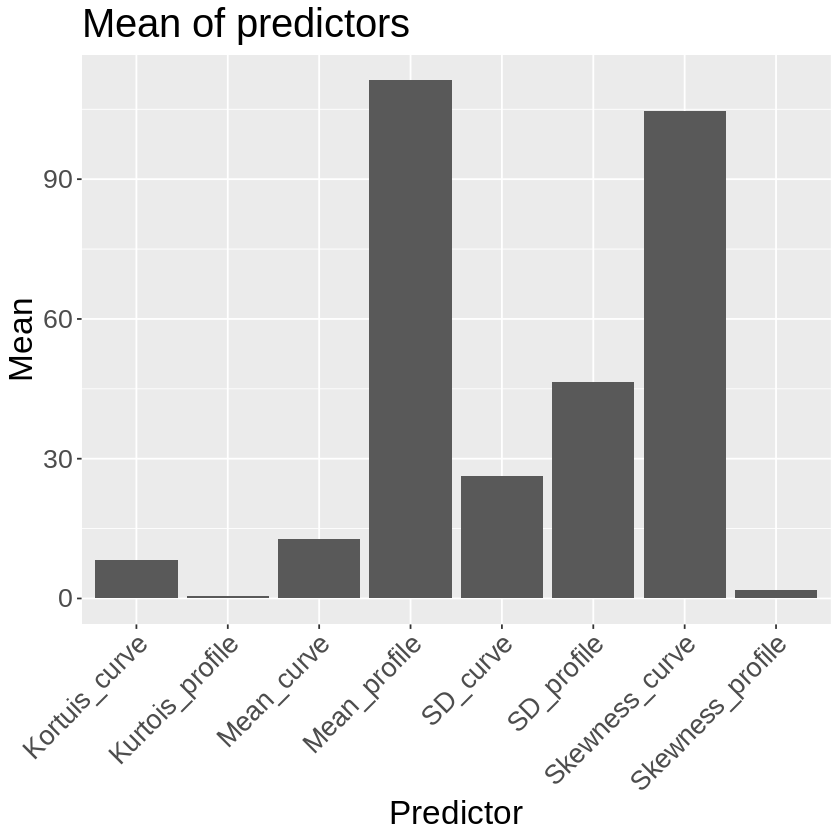

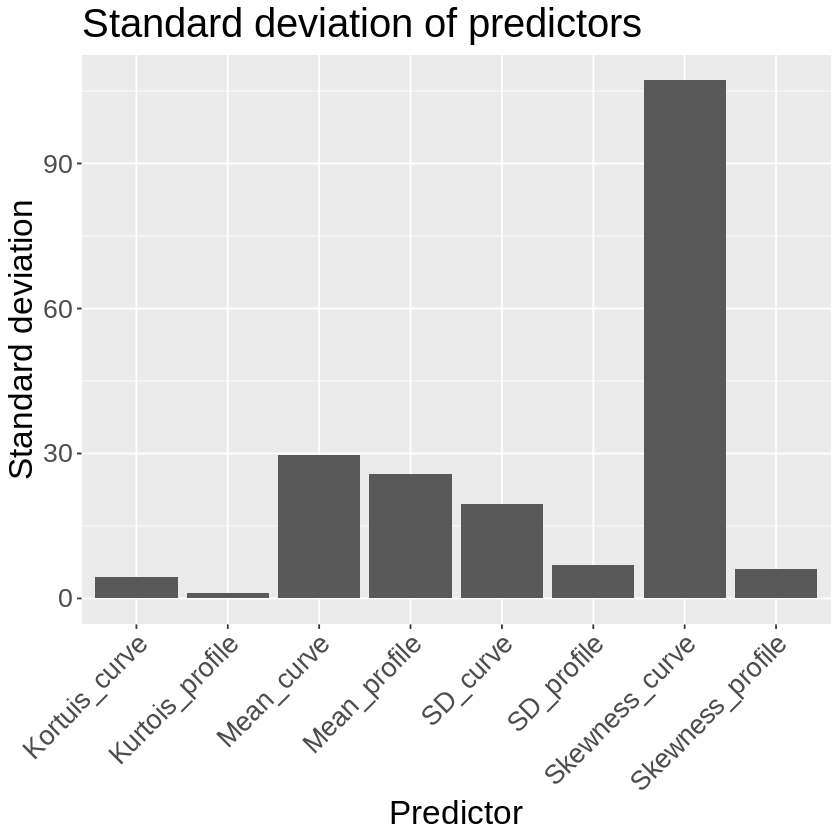

In [6]:
sd_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(sd)

pivot_long_mean <- mean_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "mean")
pivot_long_sd <- sd_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "sd")

explanatory_plot_mean <- ggplot(data = pivot_long_mean, aes(x = Variable, y = mean)) + geom_bar(stat='identity') +
    ylab("Mean") + xlab("Predictor") +
    ggtitle("Mean of predictors") +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
    theme(text = element_text(size = 20))

explanatory_plot_sd <- ggplot(data = pivot_long_sd, aes(x = Variable, y = sd)) + geom_bar(stat='identity') +
    ylab("Standard deviation") + xlab("Predictor") +
    ggtitle("Standard deviation of predictors") +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
    theme(text = element_text(size = 20))

explanatory_plot_mean
explanatory_plot_sd


### Visulization summary

On the plot above the mean and standard deviation of all the predictors are shown in two bar plots. These plots gives a quick overview of the nummerical size (by lookin at the mean) and the spread of the numbers for each predictor. It is clear that there is quite a large difference in the mean and standard deviation of the predictors, which goes to show that it is probably a good idea to centralise and standardise the data.

### Data analysis

In [ ]:
set.seed(1000)
names <- colnames(star_train |> select(-Class))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
star_vfold <- vfold_cv(star_train, v = 5, strata = Class)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        star_recipe <- recipe(as.formula(model_string), 
                                data = star_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(star_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = star_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

From the forward selection above, you can see that the best model includes 5 predictors. We will now create a model using these predictors, train it on the training set using cross validation, and then test the accuracy on the test set. We will start by tuning the model to find the best number of neighbours between 1 and 20.

In [11]:
set.seed(1000)
star_vfold <- vfold_cv(star_train, v = 5, strata = Class)
star_recipe_final <- recipe(Class ~ Kurtois_profile + Mean_profile + Mean_curve + SD_curve + SD_profile, data =star_train) %>%  
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_tune <-nearest_neighbor(weight_func ="rectangular",neighbors =tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

knn_results <- workflow() %>%
    add_recipe(star_recipe_final) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = star_vfold, grid = 20) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

knn_results




neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9722861,5,0.001284265,Preprocessor1_Model01
2,accuracy,binary,0.9722861,5,0.001284265,Preprocessor1_Model02
3,accuracy,binary,0.9783948,5,0.001400673,Preprocessor1_Model03
4,accuracy,binary,0.9783948,5,0.001400673,Preprocessor1_Model04
5,accuracy,binary,0.9793633,5,0.001531162,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
10,accuracy,binary,0.9788417,5,0.001891539,Preprocessor1_Model10
11,accuracy,binary,0.9788416,5,0.002107028,Preprocessor1_Model11
12,accuracy,binary,0.9788416,5,0.002107028,Preprocessor1_Model12


0.979363300557549 
                5

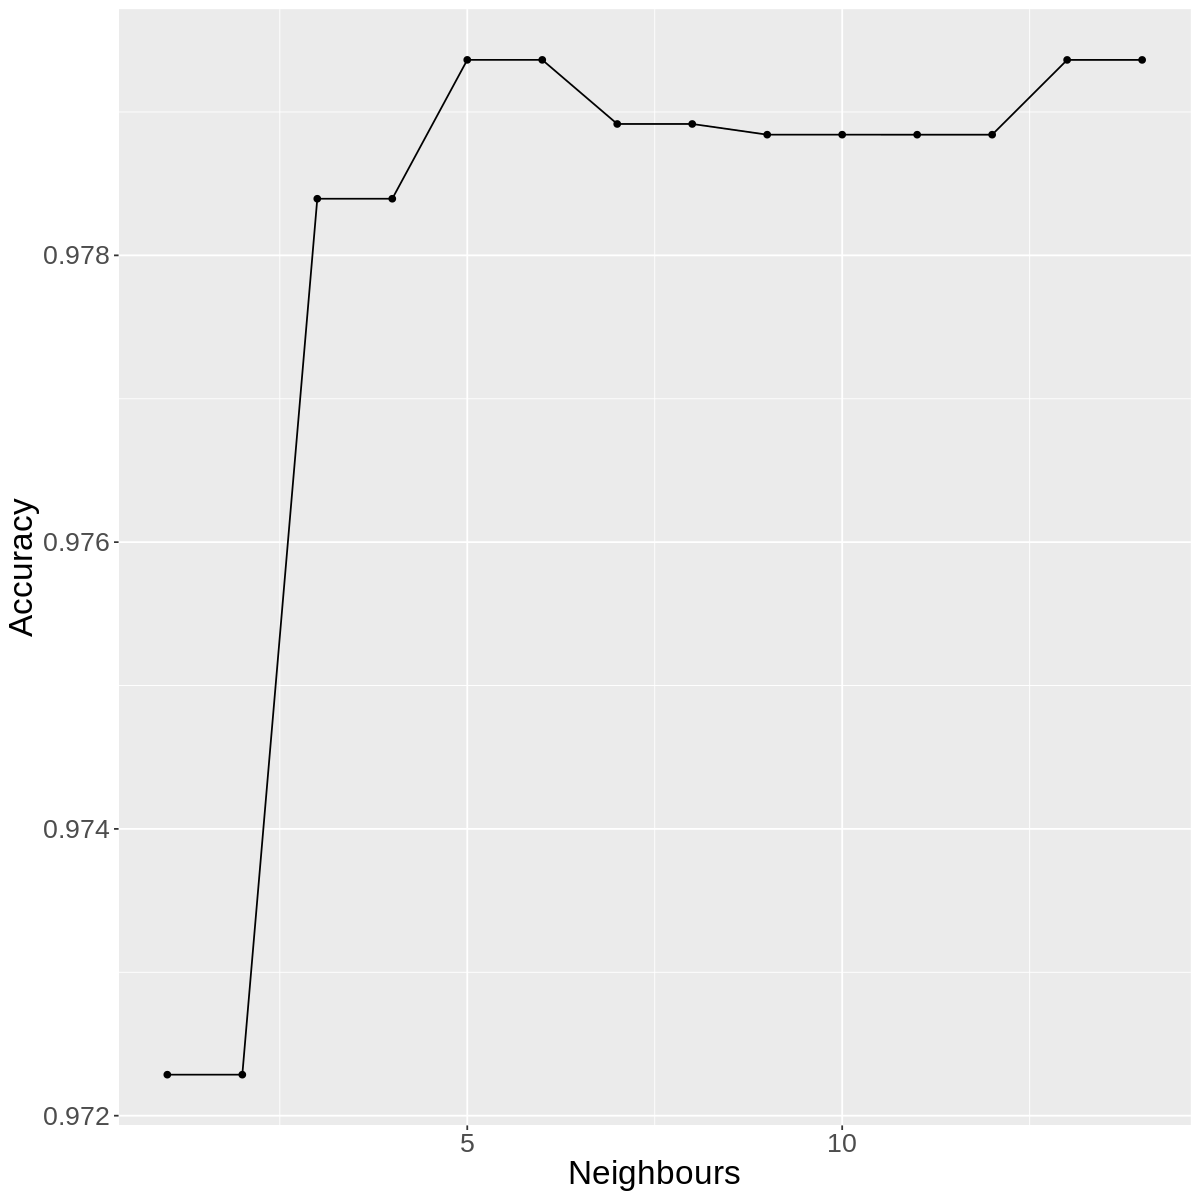

In [12]:
k_best <- knn_results %>%
    arrange(desc(mean)) %>%
    slice(1) %>%
    pull(neighbors, mean)

k_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    labs(x="Neighbours", y ="Accuracy") +
    theme(text = element_text(size = 20))

k_best
k_plot

In [13]:
knn_spec <- nearest_neighbor(weight_func ="rectangular", neighbors = 5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

knn_fit <-workflow() %>%
    add_recipe(star_recipe_final) %>%
    add_model(knn_spec) %>%
    fit(data = star_train)

star_test_predictions <-predict(knn_fit, star_test) %>%
    bind_cols(star_test)

star_test_predictions

.pred_class,Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,102.50781,58.88243,0.4653182,-0.51508791,1.677258,14.86015,10.576487,127.39358,0
1,99.36719,41.57220,1.5471970,4.15410604,27.555184,61.71902,2.208808,3.66268,1
0,105.44531,41.13997,0.1426538,0.32041968,3.551839,20.75502,7.739552,68.51977,0
0,130.85156,52.43286,0.1425967,0.01888544,2.646321,15.65444,9.464164,115.67316,0
0,102.61719,49.69235,0.2304390,0.19332537,1.489130,16.00441,12.646535,171.83290,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,130.5000,46.14955,0.08444500,-0.10735478,1.5292642,11.757086,12.533831,211.3271,0
0,121.3750,53.24516,0.10377221,-0.36511875,1.0953177,12.239976,16.258042,303.8800,0
0,118.4844,50.60848,-0.02905883,-0.02749376,0.4222408,8.086684,27.446113,830.6386,0


In [14]:
star_prediction_accuracy <- star_test_predictions %>%
    metrics(truth = Class, estimate = .pred_class)  %>% 
    filter(.metric == "accuracy")


star_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9785475


In [15]:
confusion <-star_test_predictions %>%           
    conf_mat(truth =Class, estimate =.pred_class)
confusion

          Truth
Prediction    0    1
         0 4031   67
         1   29  348

### Visualization

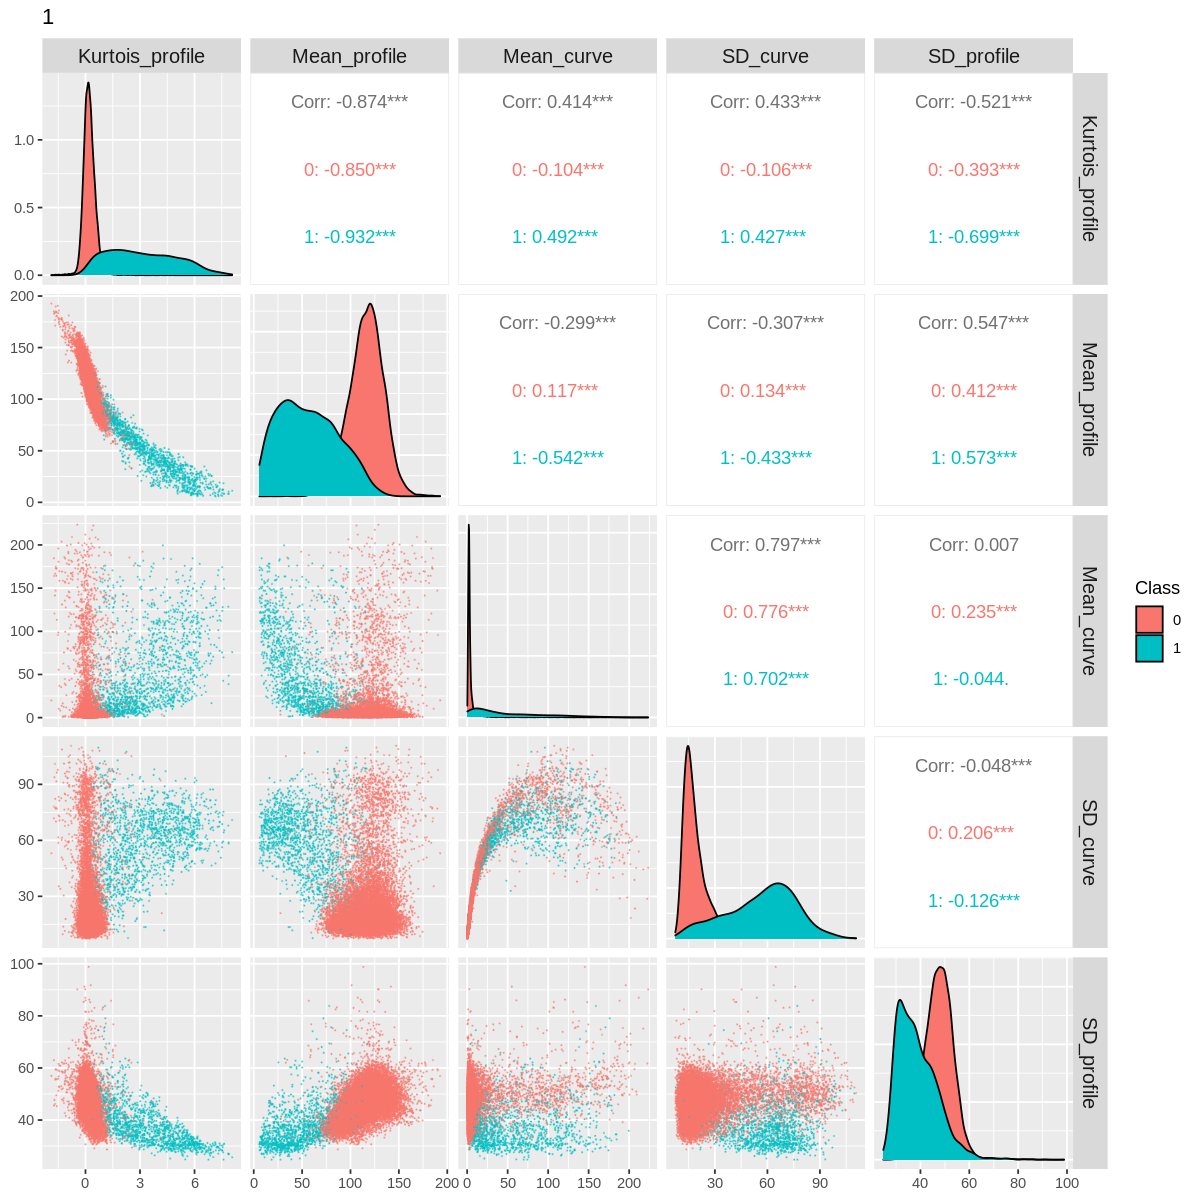

In [10]:
plot_data <- star_data |>
    mutate(Class = as_factor(Class)) |>
    select(Kurtois_profile,Mean_profile,Mean_curve,SD_curve,SD_profile,Class) 


options(repr.plot.width = 10, repr.plot.height = 10)

pm <- ggpairs(plot_data, legend=1,columns=1:5,
        lower=list(continuous = wrap(ggally_points, alpha=0.5, size = 0.0000000000001)),
        aes(color = Class))+ggtitle("1")

pm + theme(strip.text.x = element_text(size = 12),
           strip.text.y = element_text(size = 12))


The ggpairs function has been used to depict the relationships between the different predictors and the labels of the pulsar candidates. The five predictors shown in the plot have been chosen by the forward selection method for the construction of the classification model. The blue dots represent the data that were labeled "1", which are real pulsars. The red dots represent the data labeled "0", meaning the spurious examples.

### Discussion 


##### Summarize what you found
We have found a classification model that predicted the labels for the testing data set with 97.8 percent accuracy. The classifier tells us its prediction (0 or 1) in the column “.pred_class”. The model correctly predicted 4,379 out of 4,475 observations in the testing data set. However, 29 spurious examples were incorrectly predicted as pulsars, while 67 pulsars examples were mispredicted as spurious ones. 97.8% of accuracy indicates that the classifier is highly accurate. We have concluded that we can use the physical data to predict whether a pulsar candidate is a real pulsar. Thus, when we get new pulsar candidate data that were not encountered by our classifier, we can utilize our classification model to predict their classes with high speed and confidence.

##### Discuss whether this is what you expected to find?
We expected to find a highly accurate classification model that can be useful for predicting the labels of pulsar candidates. Such a model that is based on computer technology may help astronomists discover pulsars. The high accuracy of our model shows that employing our classifier is a plausible approach for addressing problems that involve the identification of pulsars.
Obtaining a highly accurate classifier is what we have already expected. Since we picked the most suitable value of k and used the forward selection method to choose the predictor variables that produce the highest accuracy, our testing result was expected to be satisfying.
Whether the 98 percent accuracy is sufficient depends on the situation in which this prediction model would be applied. For example, scientists may use our prediction model for conducting a preliminary step of astronomical research that aims to provide an idea about the approximate locations and proportions of pulsars in the sky.<br>
However, contrary to our expectations, the accuracy of the classifier we have found may not be high enough. The prediction model made incorrect predictions about some of the data in the testing set. Since 2 percent of inaccuracy still makes the model slightly unreliable, relying solely on our classification model may be inappropriate when a few pulsar candidates need to be accurately labeled. If the prediction model gives incorrect labels to new observations, scientists may conduct their studies based on the misunderstanding. Thus, when working on tasks where the consequences of mistakes cost a considerable loss of time and money, scientists may be required to be careful and conduct further examinations to identify the pulsars with higher confidence. There is room for improvement, but unfortunately, further modifications of our model are probably beyond the scope of our current knowledge.


##### Discuss what impact could such findings have?
Scientists may save time when identifying the pulsars. When finding pulsars, scientists should scan the entire sky with the telescope and filter out the noises while identifying the special type of neutron stars that produce radio waves. This process may be time-consuming, but using the classification model may alleviate this problem.<br>
The correct identification of pulsars may allow scientists to conduct extensive space research. For example, scientists may obtain a better understanding of the structure of the cosmos by studying the locations and the activities of the pulsars. According to Calla Cofield, scientists can easily find the orbiting planets near the pulsars and get a sense of time in the universe by observing the pulsars that flicker in a regular pattern. Cofield also claims that scientists can measure cosmic distances by studying the amount of time it takes for the light emitted by pulsars to travel to Earth. Understanding the stars can help with building and testing astrophysical theories, and thus, having a classification model that can identify pulsars with high accuracy may be influential in the study of astronomy.

##### Discuss what future questions could this lead to?
We may want to improve the accuracy of the classifier. The current model yields approximately 98 percent accuracy, but this figure may not be high enough depending on the purpose of the application of our classifier. We may question if there is a way to increase the classifier's accuracy, if that new method involves the collection of new predictor variables, or if the improvement would have a significant influence on the application of the model in real-life problems.<br>
Furthermore, we may question if there is another more advanced method, besides the ggpairs function, that can visualize the data with more than two predictor variables in R.<br>
We may also ask if there are other classification models for different types of stars and if the accuracy of the pulsar classification model is relatively high compared to the accuracy of these classifiers.

### References

Cofield, C. (2016, April 22). What are pulsars? Space. https://www.space.com/32661-pulsars.html<br>
Timbers, T., Campbell, T., & Lee, M. (2022, September 24). Data Science a first introduction. Boca Raton: Chapman & Hall/CRC.

Source of the data<br>
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656
